<a href="https://colab.research.google.com/github/mimiflynn/covid-data/blob/master/covid_tracking_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://covidtracking.com/api

In [0]:
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import requests as request
import pandas as pd
import numpy as np

In [3]:
today = datetime.today()
print('Last run at:')
print(today)

Last run at:
2020-05-09 12:55:02.227092


In [0]:
current_states = request.get('https://covidtracking.com/api/v1/states/current.json')
current_states_daily = request.get('https://covidtracking.com/api/v1/states/daily.json')
current_us = request.get('https://covidtracking.com/api/v1/us/current.json')

In [0]:
states = pd.DataFrame.from_dict(current_states.json())
states_daily = pd.DataFrame.from_dict(current_states_daily.json())
us = pd.DataFrame.from_dict(current_us.json())

In [6]:
states_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200508,AK,377.0,25096.0,NaN,16.0,NaN,NaN,NaN,NaN,NaN,305.0,C,5/8/2020 00:00,81130d86c029e28f831d55def58fcadc319009c7,2020-05-08T20:00:00Z,10.0,NaN,25473,25473,25473,02,0.0,0.0,1129.0,3.0,1132.0
1,20200508,AL,9221.0,110893.0,NaN,NaN,1207.0,NaN,454.0,NaN,266.0,NaN,B,5/8/2020 00:00,7aa497df30566f92a1e2edef1fc0ea0aa8bb2120,2020-05-08T20:00:00Z,375.0,1207.0,120114,120114,120114,01,26.0,29.0,4618.0,323.0,4941.0
2,20200508,AR,3694.0,60300.0,NaN,70.0,466.0,NaN,NaN,14.0,93.0,2159.0,B,5/8/2020 08:15,a4ca6c4d1efac4b48f7e80e29bbc2be13f132133,2020-05-08T20:00:00Z,88.0,466.0,63994,63994,63994,05,1.0,4.0,3916.0,83.0,3999.0
3,20200508,AS,0.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,5/3/2020 00:00,aee242eef36c48dcf1bf337be214b3af34e8e755,2020-05-08T20:00:00Z,0.0,NaN,83,83,83,60,0.0,0.0,0.0,0.0,0.0
4,20200508,AZ,10526.0,109381.0,NaN,730.0,1482.0,295.0,NaN,197.0,NaN,1747.0,A+,5/8/2020 00:00,f90cd0eb502865124ca024e8cd4dd3173109c8a9,2020-05-08T20:00:00Z,517.0,1482.0,119907,119907,119907,04,67.0,33.0,8240.0,581.0,8821.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3596,20200126,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,609165307f5d60e495d9eaed0e0f3387c7bf8eca,2020-01-26T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3597,20200125,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a8aa0b13ab29023a1508b6ab3eb78f0f5c9db331,2020-01-25T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3598,20200124,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2a78947c0c03661f5387e9e6835cb9643765943a,2020-01-24T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0
3599,20200123,WA,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24102d7fccb764d4f7c6ee847522451af42a7e2b,2020-01-23T21:00:00Z,NaN,NaN,1,1,1,53,0.0,0.0,0.0,0.0,0.0


In [0]:
ny_daily = states_daily.loc[states_daily['state'] == 'NY']

In [8]:
ny_daily

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,dataQualityGrade,lastUpdateEt,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
37,20200508,NY,330407.0,791136.0,NaN,8196.0,71679.0,2811.0,NaN,2295.0,NaN,56378.0,B,5/8/2020 00:00,cce93730cb4bfe975fc7b77442c3b664e71c74ee,2020-05-08T20:00:00Z,21045.0,71679.0,1121543,1121543,1121543,36,217.0,527.0,28869.0,2758.0,31627.0
93,20200507,NY,327649.0,762267.0,NaN,8665.0,71152.0,2976.0,NaN,2425.0,NaN,55547.0,B,5/7/2020 00:00,aa09a1b85d3fc400541054cb2c3d6b8448d876c7,2020-05-07T20:00:00Z,20828.0,71152.0,1089916,1089916,1089916,36,951.0,613.0,30324.0,3671.0,33995.0
149,20200506,NY,323978.0,731943.0,NaN,9179.0,70539.0,NaN,NaN,NaN,NaN,54597.0,B,5/6/2020 00:00,e8a0855be45dbf442e72628a2fce22a1d0e9575d,2020-05-06T20:00:00Z,19877.0,70539.0,1055921,1055921,1055921,36,232.0,672.0,24236.0,2786.0,27022.0
205,20200505,NY,321192.0,707707.0,NaN,9603.0,69867.0,NaN,NaN,NaN,NaN,58950.0,B,5/5/2020 00:00,29c3e10715681c8e3221108398fa8f4bb8572a6a,2020-05-05T20:00:00Z,19645.0,69867.0,1028899,1028899,1028899,36,230.0,536.0,19350.0,2239.0,21589.0
261,20200504,NY,318953.0,688357.0,NaN,9647.0,69331.0,NaN,NaN,NaN,NaN,58950.0,B,5/4/2020 00:00,ba4d074a61ad40eb9e794352cffbb05e283ba506,2020-05-04T20:00:00Z,19415.0,69331.0,1007310,1007310,1007310,36,226.0,595.0,18861.0,2538.0,21399.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,20200308,NY,105.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d5e8dc460e38951e9c4ed83ea6116f3d1ef964e9,2020-03-08T20:00:00Z,NaN,NaN,197,197,197,36,0.0,0.0,0.0,29.0,29.0
3461,20200307,NY,76.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4cc604c6ed1a38fd0eac5f9526682d5eb68a6b96,2020-03-07T21:00:00Z,NaN,NaN,404,168,168,36,0.0,0.0,0.0,43.0,43.0
3501,20200306,NY,33.0,92.0,236.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,a4269189c0f37537baee7e4fd80167aa7237fa7e,2020-03-06T21:00:00Z,NaN,NaN,361,125,125,36,0.0,0.0,16.0,11.0,27.0
3528,20200305,NY,22.0,76.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f5fa9d458bf8fb40664458e2710437c5e5a89aaf,2020-03-05T21:00:00Z,NaN,NaN,122,98,98,36,0.0,0.0,28.0,16.0,44.0


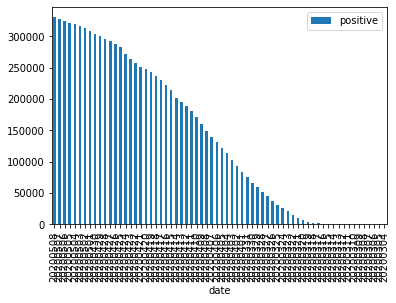

In [9]:
ny_daily.plot(x='date', y='positive', kind='bar')